 - [IBU][1]: The International Bittering Units scale, or simply IBU scale, is used to approximately quantify the bitterness of beer.
 - [ABV][2]: Alcohol by volume (abbreviated as ABV, abv, or alc/vol) is a standard measure of how much alcohol (ethanol) is contained in a given volume of an alcoholic beverage. (In our case... beer!)


  [1]: https://en.wikipedia.org/wiki/Beer_measurement
  [2]: https://en.wikipedia.org/wiki/Alcohol_by_volume


----------


**Could we determine the style beer by IBU AND ABV? Is there a correlation between IBU and ABV?**

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from  scipy.stats import pearsonr as pearson

df = pd.read_csv("beers.csv")
df.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


First of all we will clean the IBU and ABV misinformation and see the most ten commons styles

American IPA                      301
American Pale Ale (APA)           153
American Amber / Red Ale           77
American Double / Imperial IPA     75
American Pale Wheat Ale            61
American Blonde Ale                61
American Porter                    39
American Brown Ale                 38
Fruit / Vegetable Beer             30
Hefeweizen                         27
Name: style, dtype: int64


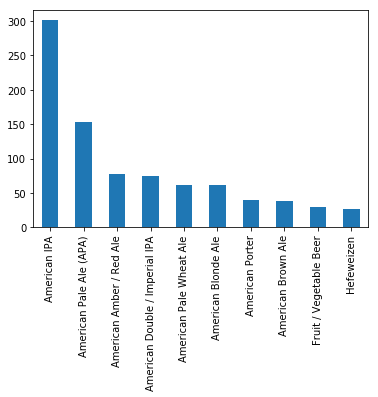

In [2]:
df = df[df["ibu"].notnull()]
clean_df = df[df["abv"].notnull()]

print (clean_df["style"].value_counts()[:10])

(clean_df["style"].value_counts()[:10]).plot(kind = 'bar')

And gets their names

In [3]:
styles = (clean_df["style"].value_counts()[:10]).keys()

print(styles)

Index(['American IPA', 'American Pale Ale (APA)', 'American Amber / Red Ale',
       'American Double / Imperial IPA', 'American Pale Wheat Ale',
       'American Blonde Ale', 'American Porter', 'American Brown Ale',
       'Fruit / Vegetable Beer', 'Hefeweizen'],
      dtype='object')


## IBU vs ABV ##
Could we determine the style beer by IBU AND ABV? Is there a correlation between IBU and ABV?

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


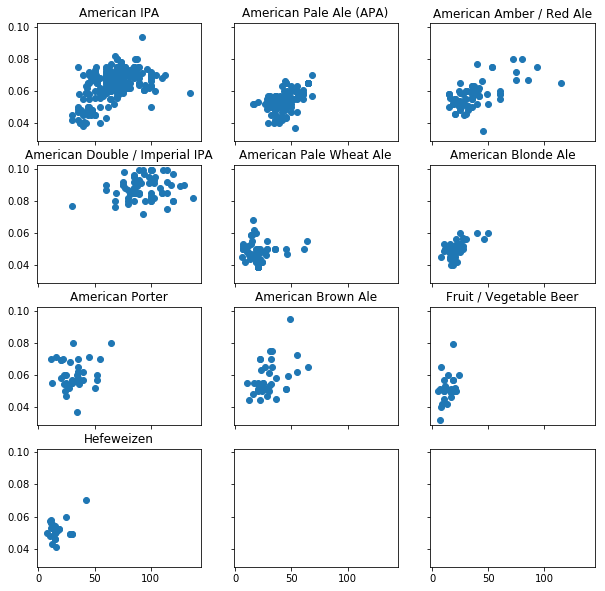

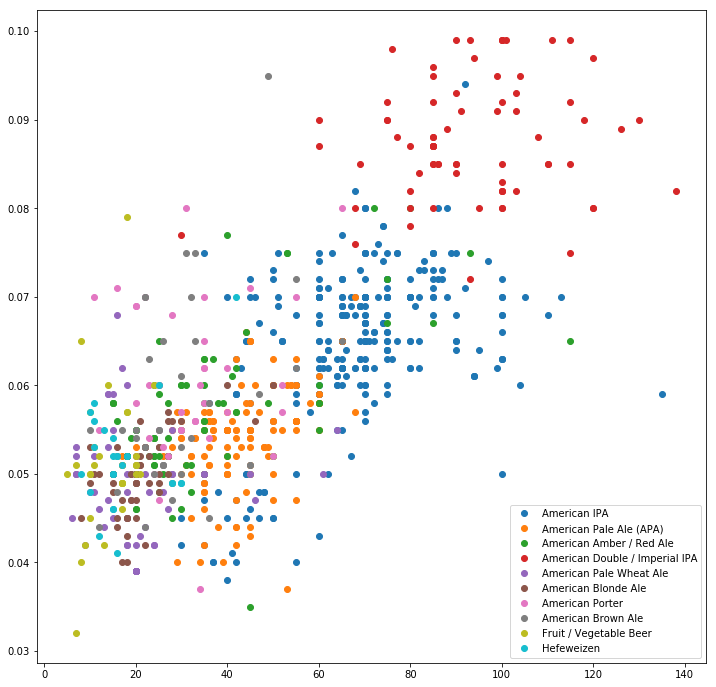

In [4]:
fig, axes = plt.subplots(4, 3, sharex = True, sharey = True, figsize=(10,10)) # One beer style by figure  
fig, global_ax = plt.subplots(figsize=(12,12)) # All beers styles in one figure.
x_max = clean_df["ibu"].max() # Get the max ibu value
y_max = clean_df["abv"].max() # Get the max abv value

for style, ax in zip(styles, axes.ravel()):
    ibu_data = clean_df["ibu"][clean_df["style"] == style].values
    abv_data = clean_df["abv"][clean_df["style"] == style].values
    
    ax.set_title(style)
    ax.plot(ibu_data, abv_data, marker = 'o', linestyle = '')
    ax.legend(numpoints=1, loc='lower right', fontsize = 10)

    global_ax.plot(ibu_data, abv_data, marker = 'o', label = style, linestyle = '')

global_ax.legend(numpoints=1, loc='lower right', fontsize = 10)

plt.show()

Based on the first figure I get some conclusions:

 - **American IPA** and **American Amber/ Red Ale** combines too many IBUs and ABVs.
 - The IBU and ABV range of **American Blonde  Ale** and **American Pale Wheat  Ale** are almost identical. 
 - **Fruit / Vegetable Beer** is the most soft flavours and then **Hefeweizen**.
 - **American Double / Imperial ALE** is  most bitterness and alcoholic beer.
 - **American Brown Ale** and **American Porter** seems to be are almost identical with relatively low IBU and wide range in acohol.
 - **American Pale Ale** tends to be a soft beer.

Regarding the second figure, seems to be a fuzzy linear correlation so we will use [Pearson Correlation Coefficient][1] in order to measure of the linear dependence between IBU and ABV. The result will be a value between +1 and −1 inclusive, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.


  [1]: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [5]:
print(pearson(clean_df["ibu"].values, clean_df["abv"].values)[0])

0.670621484997


0.67 it's relatively close to 1 so depending on the case, could be useful.

¿Is it possible classify the style beers by IBU and ABV?
I think that is not possible differentiate **ALL** only with IBU and ABV because many style beers are overlap but clearly we could differentiate an **American Double / Imperial ALE**  from a **Fruit / Vegetable Beer**.
Maybe with more data about the beer composition we could build an insteresting classification model.